<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-2-Applied-Modeling/blob/master/P1Copy_of_PingH1Copy_of_H1Copy_of_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

My dataset is from https://www.bls.gov/web/cewqtr.supp.toc.htm

Choose your target.----------wage.

Which column in your tabular dataset will you predict?----Average Weekly Wage

Is your problem regression or classification?-------------regression



In [5]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.2MB/s 


In [13]:
import pandas as pd
df=pd.read_excel('2019_2ndQ_wage_industry.xlsx')
print(df.shape)
df.head()

(62742, 21)


,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Status Code,Establishment Count,April Employment,May Employment,June Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2019,2,Nation,NaN,U.S. TOTAL,Total Covered,"10 Total, all industries",NaN,10252043,147522541,148607380,149089158,2111761785894,1095,1.0,1.0
1,US000,US,0.0,1,10,2019,2,Nation,NaN,U.S. TOTAL,Federal Government,"10 Total, all industries",NaN,59824,2800541,2814885,2827888,59738450845,1633,1.0,1.0
2,US000,US,0.0,2,10,2019,2,Nation,NaN,U.S. TOTAL,State Government,"10 Total, all industries",NaN,69905,4680392,4678471,4605421,72130616273,1192,1.0,1.0
3,US000,US,0.0,3,10,2019,2,Nation,NaN,U.S. TOTAL,Local Government,"10 Total, all industries",NaN,171092,14591536,14698871,14377408,197299604678,1043,1.0,1.0
4,US000,US,0.0,5,10,2019,2,Nation,NaN,U.S. TOTAL,Private,"10 Total, all industries",NaN,9951222,125450072,126415153,127278441,1782593114098,1085,1.0,1.0


There are 13 weeks in this quarter. According to BLS describe about this data set,"average weekly wage values are calculated by dividing quarterly total wages by the average of the three monthly."Average weekly wages are affected by the ratio of full-time to part-time workers as well as the number of 
individuals in high-paying and low-paying occupations and the incidence of pay periods within a quarter. For instance, the average weekly wage of the workforce could increase significantly when there is a large decline in 
the number of employees that had been receiving below-average wages. Wages may include payments to workers not present in the employment counts because they did not work during the pay period including the 12th of the 
month. When comparing average weekly wage levels between industries, states, or quarters, these factors should 
be taken into consideration.


In [4]:
df.isnull().sum()

Area\nCode                                           0
St                                                6709
Cnty                                              6709
Own                                                  0
NAICS                                                0
Year                                                 0
Qtr                                                  0
Area Type                                            0
St Name                                           6727
Area                                                 0
Ownership                                            0
Industry                                             0
Status Code                                      59123
Establishment Count                                  0
April Employment                                     0
May Employment                                       0
June Employment                                      0
Total Quarterly Wages                                0
Average We

In [5]:
df.columns.to_list()

['Area\nCode',
 'St',
 'Cnty',
 'Own',
 'NAICS',
 'Year',
 'Qtr',
 'Area Type',
 'St Name',
 'Area',
 'Ownership',
 'Industry',
 'Status Code',
 'Establishment Count',
 'April Employment',
 'May Employment',
 'June Employment',
 'Total Quarterly Wages',
 'Average Weekly Wage',
 'Employment Location Quotient Relative to U.S.',
 'Total Wage Location Quotient Relative to U.S.']

In [0]:
df= df.drop(columns=['Cnty',  'St Name', 'Status Code'])

In [0]:
df=df.drop(columns=['Year','Qtr','Total Quarterly Wages'])

In [137]:
df.describe()

,Cnty,Own,NAICS,Establishment Count,April Employment,May Employment,June Employment,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
count,56033.000000,62742.000000,62742.000000,6.274200e+04,6.274200e+04,6.274200e+04,6.274200e+04,62742.000000,62742.000000,62742.000000
mean,115.945282,4.195977,624.283399,2.453553e+03,3.350102e+04,3.374713e+04,3.390944e+04,798.408466,1.072296,1.110454
std,153.531987,1.568151,483.586548,7.083353e+04,9.306942e+05,9.374311e+05,9.419742e+05,383.358658,3.158758,3.167968
min,0.000000,0.000000,10.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,5.000000,10.000000,1.900000e+01,1.390000e+02,1.430000e+02,1.450000e+02,621.000000,0.500000,0.412500
50%,79.000000,5.000000,1012.000000,7.200000e+01,8.940000e+02,9.070000e+02,9.170000e+02,785.000000,0.860000,0.830000
75%,137.000000,5.000000,1024.000000,3.730000e+02,5.259000e+03,5.312000e+03,5.342000e+03,981.000000,1.100000,1.140000
max,999.000000,5.000000,1029.000000,1.025204e+07,1.475225e+08,1.486074e+08,1.490892e+08,6538.000000,655.850000,620.910000


In [0]:
df.columns.to_list()

In [38]:
df.select_dtypes(exclude="number").columns.tolist()

['Area\nCode', 'St', 'Area Type', 'Area', 'Ownership', 'Industry']

In [8]:
df['Area\nCode'].value_counts()

48401    18
C1714    18
51133    18
41061    18
48437    18
         ..
31117    12
19999    11
38087    11
31007    11
11999    10
Name: Area\nCode, Length: 3624, dtype: int64

In [0]:
# drop na in the state(St)
df=df.dropna(subset=['St'])

In [14]:
df.isnull().sum()

Area\nCode                                       0
St                                               0
Own                                              0
NAICS                                            0
Area Type                                        0
Area                                             0
Ownership                                        0
Industry                                         0
Establishment Count                              0
April Employment                                 0
May Employment                                   0
June Employment                                  0
Total Quarterly Wages                            0
Average Weekly Wage                              0
Employment Location Quotient Relative to U.S.    0
Total Wage Location Quotient Relative to U.S.    0
dtype: int64

In [15]:
df['St'].unique()

array(['US', '01', '02', '04', '05', '06', '08', '09', '10', '11', '12',
       '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47',
       '48', '49', '50', '51', '53', '54', '55', '56'], dtype=object)

In [16]:
df['Own'].value_counts()

5    43161
0     3243
1     3240
3     3227
2     3162
Name: Own, dtype: int64

In [18]:
df['Area Type'].unique()

array(['Nation', 'State', 'County'], dtype=object)

In [21]:
df['Area'].unique()


array(['U.S. TOTAL', 'Alabama -- Statewide', 'Autauga County, Alabama',
       ..., 'Washakie County, Wyoming', 'Weston County, Wyoming',
       'Unknown Or Undefined, Wyoming'], dtype=object)

In [22]:
df['Area'].describe()

count                    56033
unique                    3242
top       District of Columbia
freq                        36
Name: Area, dtype: object

In [23]:
df['Ownership'].unique()

array(['Total Covered', 'Federal Government', 'State Government',
       'Local Government', 'Private'], dtype=object)

In [24]:
df['Industry'].unique()

array(['10 Total, all industries', '101 Goods-producing',
       '1011 Natural resources and mining', '1012 Construction',
       '1013 Manufacturing', '102 Service-providing',
       '1021 Trade, transportation, and utilities', '1022 Information',
       '1023 Financial activities',
       '1024 Professional and business services',
       '1025 Education and health services',
       '1026 Leisure and hospitality', '1027 Other services',
       '1029 Unclassified'], dtype=object)

In [39]:
df['NAICS'].describe()

count    56033.000000
mean       623.649010
std        483.698825
min         10.000000
25%         10.000000
50%       1012.000000
75%       1024.000000
max       1029.000000
Name: NAICS, dtype: float64

In [26]:
df['Establishment Count'].describe()

count    5.603300e+04
mean     2.163361e+03
std      7.448280e+04
min      1.000000e+00
25%      1.600000e+01
50%      5.700000e+01
75%      2.700000e+02
max      1.025204e+07
Name: Establishment Count, dtype: float64

In [27]:
df['April Employment'].describe()

count    5.603300e+04
mean     2.917408e+04
std      9.788781e+05
min      0.000000e+00
25%      1.170000e+02
50%      6.810000e+02
75%      3.678000e+03
max      1.475225e+08
Name: April Employment, dtype: float64

In [0]:
import numpy as np


In [30]:
df['Employment Location Quotient Relative to U.S.'].describe()

count    56033.000000
mean         1.084267
std          3.323905
min          0.000000
25%          0.480000
50%          0.850000
75%          1.110000
max        655.850000
Name: Employment Location Quotient Relative to U.S., dtype: float64

In [31]:
df['Total Wage Location Quotient Relative to U.S.'].describe()

count    56033.000000
mean         1.125547
std          3.331689
min          0.000000
25%          0.400000
50%          0.820000
75%          1.150000
max        620.910000
Name: Total Wage Location Quotient Relative to U.S., dtype: float64

In [33]:
df['Average Weekly Wage'].describe()

count    56033.000000
mean       784.927204
std        378.885403
min          0.000000
25%        611.000000
50%        770.000000
75%        964.000000
max       6538.000000
Name: Average Weekly Wage, dtype: float64

 How is your target distributed?


Regression: Is the target right-skewed? If so, you may want to log transform the target.



In [40]:
#Meean baseline 
df['Average Weekly Wage'].mean()




784.9272036121571

In [138]:
df.shape

(62742, 18)

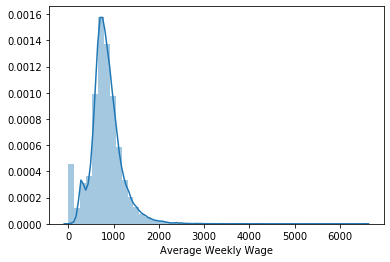

In [16]:
import seaborn as sns
y= df['Average Weekly Wage']
sns.distplot(y);

### Lower bound and Upper Bound are numberic data. From following I will check whether they are outliers.  Do I need  exclude them? 

Yes, there are outliers. Some really high and some really low. I will remove the most extreme 1% wage.

In [23]:
import numpy as np
df= df[(df['Average Weekly Wage'] >= np.percentile(df['Average Weekly Wage'],5))]
df.shape     


(62742, 15)

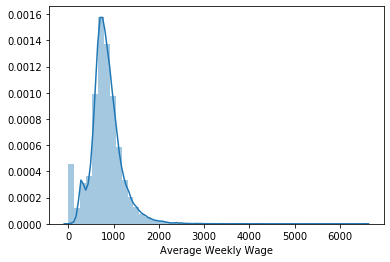

In [24]:
y=df['Average Weekly Wage']
sns.distplot(y);

The shape is till same as before(right_skewed). So we need log -Transform the target.. 

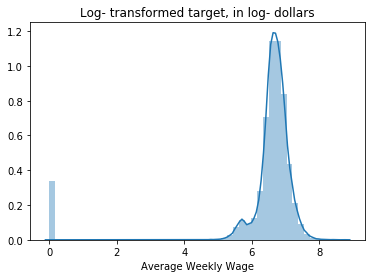

In [25]:
y_log = np.log1p(y)
import matplotlib.pyplot as plt

sns.distplot(y_log)
plt.title('Log- transformed target, in log- dollars');

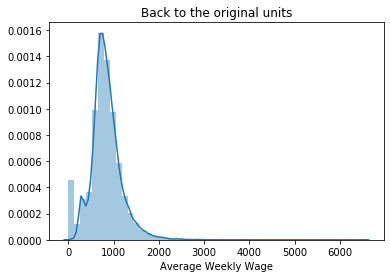

In [26]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');

In [0]:
y= y_untransformed

In [0]:
from sklearn.model_selection import train_test_split


In [0]:

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)


In [30]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(50193, 15) (50193,)
(12549, 15) (12549,)


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)

(40154, 15) (40154,)
(10039, 15) (10039,)


In [0]:
target = 'Average Weekly Wage'
features= df.columns. drop([target])

In [0]:
!pip install category_encoders==2.*

In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor


In [34]:



pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth=2)
)
pipeline.fit(X_train,y_train)
print('Validation Accuracy:', pipeline.score(X_val,y_val))

Validation Accuracy: 0.8491232524759184


Validation Accuracy: 0.85 

In [0]:
import graphviz

In [0]:
# This score is too good to be true.
# Visualize the RandomeForestClassification to see what the model "learned"
target = 'Average Weekly Wage'
features= df.columns. drop([target])
X_train =X_train[features]

X_val = X_val[features]


In [0]:
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['randomforestregressor']

dot_data = export_graphviz(
    tree, 
    out_file = None,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False
)

graphviz.Source(dot_data)